In [145]:
!pip install datetime

In [2]:
%matplotlib notebook

In [494]:
#Dependencies 
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import csv
import seaborn as sns
sns.set()
from scipy.stats import linregress
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
%matplotlib inline

In [495]:
vaccine_data = pd.read_csv("country_vaccinations.csv")
vaccine_data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63396,Zimbabwe,ZWE,2021-12-06,6775471.0,3883107.0,2892364.0,15882.0,26995.0,44.89,25.73,19.16,1789.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
63397,Zimbabwe,ZWE,2021-12-07,6808392.0,3897441.0,2910951.0,32921.0,28064.0,45.11,25.82,19.29,1860.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
63398,Zimbabwe,ZWE,2021-12-08,6834846.0,3908712.0,2926134.0,26454.0,27772.0,45.29,25.90,19.39,1840.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
63399,Zimbabwe,ZWE,2021-12-09,6871310.0,3924960.0,2946350.0,36464.0,27028.0,45.53,26.01,19.52,1791.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


In [496]:
clean_vaccine_data = vaccine_data.replace(np.nan,0)
clean_vaccine_data.head()
#clean_vaccine_data.isnull().sum()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [507]:
clean_vaccine_data['date'] = pd.to_datetime(clean_vaccine_data['date'])


In [497]:
cases = pd.read_csv('./Resources/owid-covid-data.csv')
cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [498]:
cases = cases.replace(np.nan, 0)
cases.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,25/02/2020,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,26/02/2020,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,27/02/2020,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,28/02/2020,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.746,0.5,64.83,0.511,0.0,0.0,0.0,0.0


In [508]:
cases['date'] = pd.to_datetime(cases['date'])

In [499]:
vacc_cases = pd.merge(clean_vaccine_data, cases, on=['iso_code', 'date'], how='outer')
vacc_cases.head(10)

,country,iso_code,date,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred_x,people_vaccinated_per_hundred_x,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,2021-02-27,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,0.0,0.0,1367.0,0.02,0.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,2021-03-01,0.0,0.0,0.0,0.0,1580.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,2021-03-02,0.0,0.0,0.0,0.0,1794.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,2021-03-03,0.0,0.0,0.0,0.0,2008.0,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [298]:
vacc_cases.describe()

,total_vaccinations_x,people_vaccinated_x,people_fully_vaccinated_x,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred_x,people_vaccinated_per_hundred_x,people_fully_vaccinated_per_hundred_x,daily_vaccinations_per_million,total_cases,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,6.340100e+04,6.340100e+04,6.340100e+04,6.340100e+04,6.340100e+04,63401.000000,63401.000000,63401.000000,63401.000000,1.409550e+05,...,140955.000000,140955.000000,140955.000000,140955.000000,140955.000000,140955.000000,140955.000000,140955.000000,140955.000000,140955.000000
mean,1.666843e+07,6.508475e+06,4.243278e+06,1.171398e+05,1.329047e+05,31.776073,17.163699,12.727819,3443.887447,2.082256e+06,...,7.080389,21.591319,21.978341,2.362167,68.152646,0.624145,1198.471840,0.321217,0.578435,29.893635
std,1.200716e+08,3.642675e+07,2.411263e+07,8.384889e+05,8.131819e+05,49.633357,25.801337,22.125649,4129.223028,1.219129e+07,...,9.927781,19.012705,32.739314,2.504011,20.049404,0.287947,18971.150495,3.572856,6.645306,282.738570
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-31959.400000,-28.450000,-95.920000,-1745.051271
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.550000e+02,0.000000,0.000000,0.000000,636.000000,1.421000e+03,...,0.000000,0.000000,0.000000,0.400000,66.120000,0.527000,0.000000,0.000000,0.000000,0.000000
50%,2.857000e+04,1.864000e+03,0.000000e+00,0.000000e+00,7.364000e+03,0.720000,0.030000,0.000000,2236.000000,2.190500e+04,...,1.900000,21.400000,0.000000,1.700000,74.050000,0.718000,0.000000,0.000000,0.000000,0.000000
75%,2.906350e+06,1.611578e+06,8.226270e+05,1.690600e+04,4.246400e+04,50.680000,30.390000,16.120000,5017.000000,2.557580e+05,...,10.200000,37.000000,41.949000,3.400000,78.510000,0.820000,0.000000,0.000000,0.000000,0.000000
max,2.591879e+09,1.225000e+09,1.125000e+09,2.474100e+07,2.242429e+07,303.220000,121.770000,118.340000,117497.000000,2.722054e+08,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,984309.300000,115.000000,374.010000,7521.733362


In [510]:
vacc_cases_new = vacc_cases.groupby(['country', pd.Grouper(key='date',freq='M')]).agg({'total_vaccinations_x':np.max,
                                                    'total_cases':np.max,
                                                    'new_cases':np.max,
                                                    'people_vaccinated_x':np.max,
                                                   'people_fully_vaccinated_x':np.max,
                                                   'daily_vaccinations':np.max,
                                                   'daily_vaccinations_per_million':np.max,
                                                    'total_deaths':np.max,
                                                    'gdp_per_capita':np.max,
                                                    'hospital_beds_per_thousand':np.max,
                                                    'life_expectancy':np.average,
                                                   })
vacc_cases_new = vacc_cases_new.reset_index()

vacc_cases_new = vacc_cases_new.rename(columns={'date':'Month'})

vacc_cases_new['Month'] = pd.DatetimeIndex(vacc_cases_new['Month']).strftime('%m-%Y')
vacc_cases_new.head(20)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

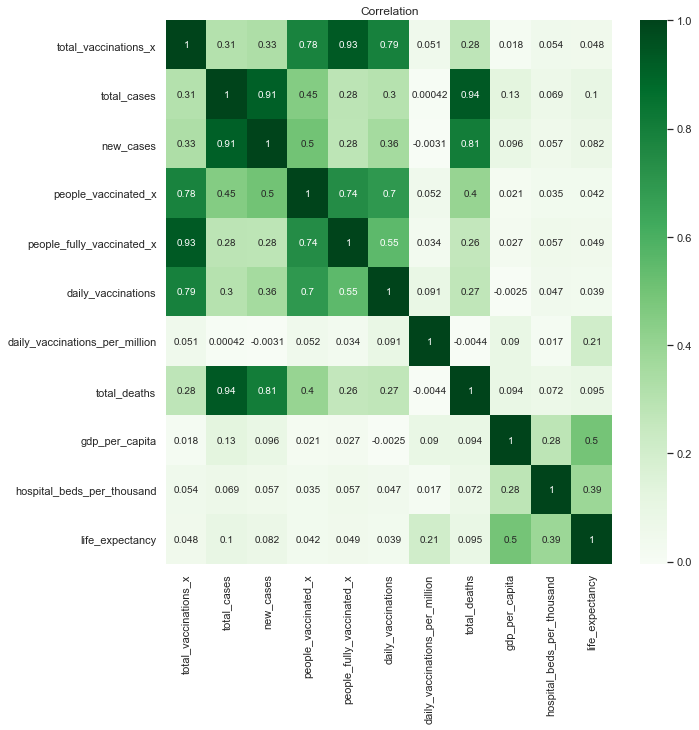

In [501]:
plt.figure(figsize=(10,10))
sns.heatmap(data = vacc_cases_new.corr(), annot = True, cmap = 'Greens')
plt.title('Correlation')
plt.savefig('./SB_Output/Heat Map')
plt.show()

In [502]:
Aus_data = vacc_cases_new.loc[vacc_cases_new["country"] == "Australia"]
Aus_data

,country,Month,total_vaccinations_x,total_cases,new_cases,people_vaccinated_x,people_fully_vaccinated_x,daily_vaccinations,daily_vaccinations_per_million,total_deaths,gdp_per_capita,hospital_beds_per_thousand,life_expectancy
110,Australia,02-2021,34630.0,28978.0,10.0,34618.0,12.0,5996.0,233.0,909.0,44648.71,3.84,83.44
111,Australia,03-2021,744330.0,216587.0,2023.0,671606.0,72724.0,47989.0,1861.0,2042.0,44648.71,3.84,83.44
112,Australia,04-2021,2234844.0,217836.0,2389.0,1976315.0,258529.0,62784.0,2435.0,2050.0,44648.71,3.84,83.44
113,Australia,05-2021,4362739.0,219121.0,2026.0,3856485.0,506254.0,96017.0,3723.0,2056.0,44648.71,3.84,83.44
114,Australia,06-2021,7742536.0,220555.0,2216.0,6109102.0,1633434.0,122092.0,4734.0,2065.0,44648.71,3.84,83.44
115,Australia,07-2021,12334071.0,222260.0,2524.0,8407015.0,3927056.0,171977.0,6669.0,2072.0,44648.71,3.84,83.44
116,Australia,08-2021,19663122.0,223914.0,2515.0,12293802.0,7369320.0,277832.0,10774.0,2082.0,44648.71,3.84,83.44
117,Australia,09-2021,28035888.0,225625.0,2400.0,16649549.0,11386339.0,295848.0,11472.0,2084.0,44648.71,3.84,83.44
118,Australia,10-2021,35603091.0,227382.0,2744.0,19052562.0,16529442.0,294264.0,11411.0,2100.0,44648.71,3.84,83.44
119,Australia,11-2021,39282954.0,228925.0,1848.0,20025197.0,18808812.0,189124.0,7334.0,2104.0,44648.71,3.84,83.44


In [503]:
NZ_data = vacc_cases_new.loc[vacc_cases_new["country"] == "New Zealand"]
NZ_data

,country,Month,total_vaccinations_x,total_cases,new_cases,people_vaccinated_x,people_fully_vaccinated_x,daily_vaccinations,daily_vaccinations_per_million,total_deaths,gdp_per_capita,hospital_beds_per_thousand,life_expectancy
1505,New Zealand,02-2021,6712.0,2378.0,7.0,6711.0,1.0,935.0,183.0,26.0,36085.843,2.61,82.29
1506,New Zealand,03-2021,73740.0,12089.0,140.0,58159.0,15580.0,4090.0,798.0,44.0,36085.843,2.61,82.29
1507,New Zealand,04-2021,275832.0,12197.0,166.0,201841.0,73989.0,8022.0,1566.0,44.0,36085.843,2.61,82.29
1508,New Zealand,05-2021,651838.0,12333.0,204.0,422557.0,229277.0,14789.0,2887.0,44.0,36085.843,2.61,82.29
1509,New Zealand,06-2021,1175569.0,12430.0,114.0,719417.0,456144.0,19053.0,3719.0,44.0,36085.843,2.61,82.29
1510,New Zealand,07-2021,1924555.0,12518.0,192.0,1179698.0,744842.0,35145.0,6861.0,44.0,36085.843,2.61,82.29
1511,New Zealand,08-2021,3515336.0,12623.0,127.0,2299740.0,1215569.0,81274.0,15866.0,44.0,36085.843,2.61,82.29
1512,New Zealand,09-2021,5226627.0,12623.0,147.0,3297604.0,1928976.0,81465.0,15903.0,44.0,36085.843,2.61,82.29
1513,New Zealand,10-2021,6872169.0,12783.0,185.0,3708475.0,3163162.0,74935.0,14628.0,46.0,36085.843,2.61,82.29
1514,New Zealand,11-2021,7579744.0,12886.0,222.0,3894388.0,3620067.0,37432.0,7307.0,46.0,36085.843,2.61,82.29


In [504]:
comp_data_df = pd.merge(Aus_data, NZ_data, how='outer')
comp_data_df.head(20)

,country,Month,total_vaccinations_x,total_cases,new_cases,people_vaccinated_x,people_fully_vaccinated_x,daily_vaccinations,daily_vaccinations_per_million,total_deaths,gdp_per_capita,hospital_beds_per_thousand,life_expectancy
0,Australia,02-2021,34630.0,28978.0,10.0,34618.0,12.0,5996.0,233.0,909.0,44648.710,3.84,83.44
1,Australia,03-2021,744330.0,216587.0,2023.0,671606.0,72724.0,47989.0,1861.0,2042.0,44648.710,3.84,83.44
2,Australia,04-2021,2234844.0,217836.0,2389.0,1976315.0,258529.0,62784.0,2435.0,2050.0,44648.710,3.84,83.44
3,Australia,05-2021,4362739.0,219121.0,2026.0,3856485.0,506254.0,96017.0,3723.0,2056.0,44648.710,3.84,83.44
4,Australia,06-2021,7742536.0,220555.0,2216.0,6109102.0,1633434.0,122092.0,4734.0,2065.0,44648.710,3.84,83.44
5,Australia,07-2021,12334071.0,222260.0,2524.0,8407015.0,3927056.0,171977.0,6669.0,2072.0,44648.710,3.84,83.44
6,Australia,08-2021,19663122.0,223914.0,2515.0,12293802.0,7369320.0,277832.0,10774.0,2082.0,44648.710,3.84,83.44
7,Australia,09-2021,28035888.0,225625.0,2400.0,16649549.0,11386339.0,295848.0,11472.0,2084.0,44648.710,3.84,83.44
8,Australia,10-2021,35603091.0,227382.0,2744.0,19052562.0,16529442.0,294264.0,11411.0,2100.0,44648.710,3.84,83.44
9,Australia,11-2021,39282954.0,228925.0,1848.0,20025197.0,18808812.0,189124.0,7334.0,2104.0,44648.710,3.84,83.44


In [515]:
comp_data_df.groupby("Month")

sep_data_df = comp_data_df[["new_cases", "total_cases", "people_fully_vaccinated_x", "total_deaths", "Month"]]

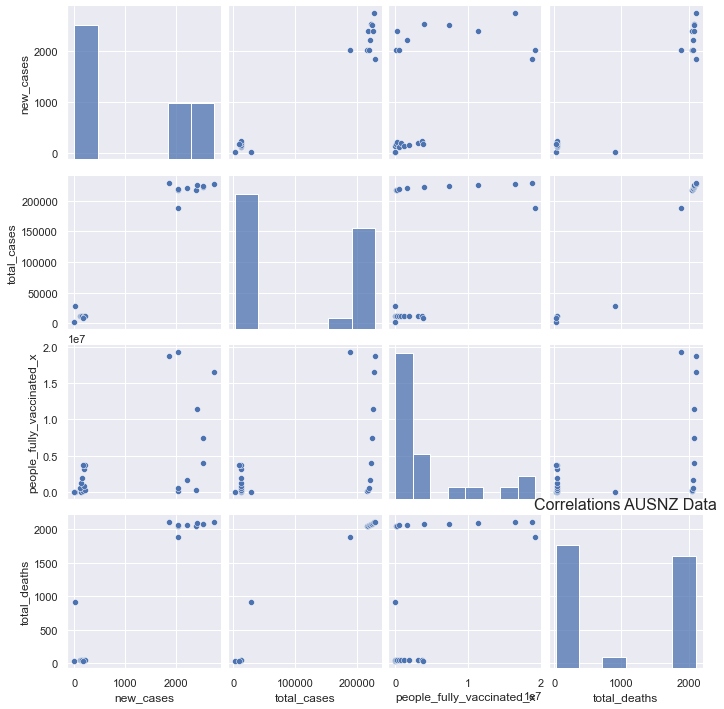

In [547]:
corr_plot=sns.pairplot(sep_data_df.loc[:,sep_data_df.dtypes == 'float64'])
fig = corr_plot
plt.title('Correlations AUSNZ Data', fontsize=16)
fig.savefig('./SB_Output/Vaccinations AusNz', dpi='figure') 

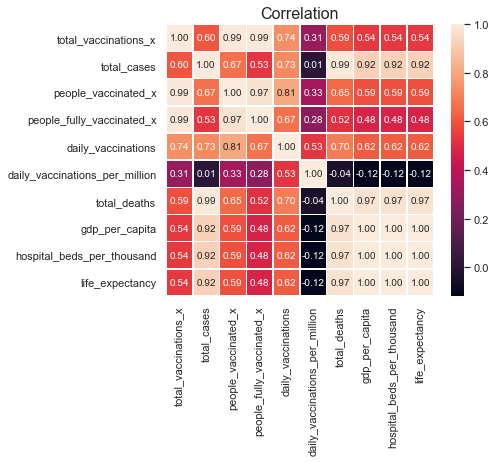

In [471]:
sns.heatmap(comp_data_df.corr(), linewidths=.6, annot=True, fmt=".2f")
plt.title('Correlation', fontsize=16)
plt.savefig('./SB_Output/Correlation AusNz')
plt.show()

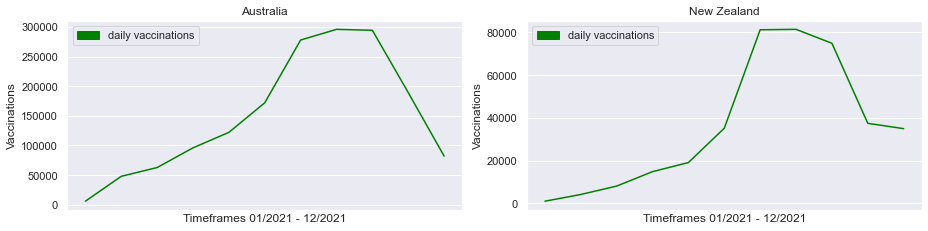

In [520]:
top_countries = comp_data_df.loc[comp_data_df['country'].isin(comp_data_df.sort_values('daily_vaccinations', ascending= False).reset_index()['country'][:10])]

plt.figure(figsize= (13, 15))

i = 1
for country in top_countries['country'].unique():
    
    data = top_countries.loc[top_countries['country'] == country]
    
    plt.subplot(5, 2, i)
    sns.lineplot(x = data['Month'],
                y = data['daily_vaccinations'],
                color= 'green')
    
    plt.title(str(country))
    plt.xticks(['2021'])
    plt.ylabel('Vaccinations')
    plt.xlabel('Timeframes 01/2021 - 12/2021')
    
    i += 1

    deaths_patch = mpatches.Patch(color='green', label='daily vaccinations')
    plt.legend(handles=[deaths_patch])
    
plt.tight_layout()
plt.savefig('./SB_Output/Vaccinations AusNz')
plt.show()


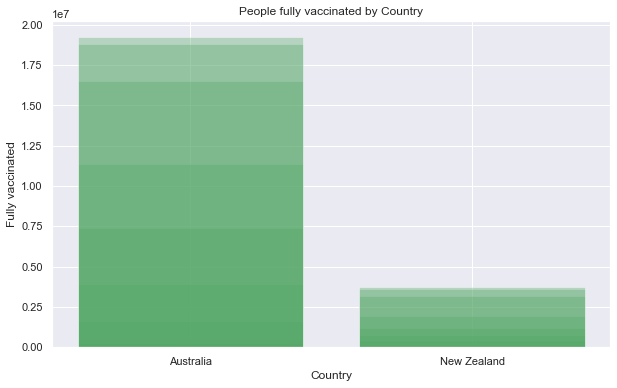

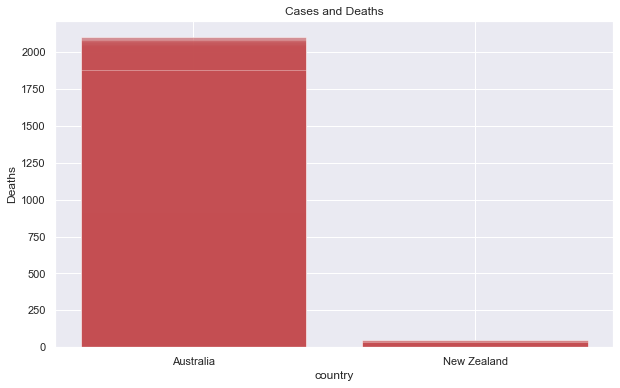

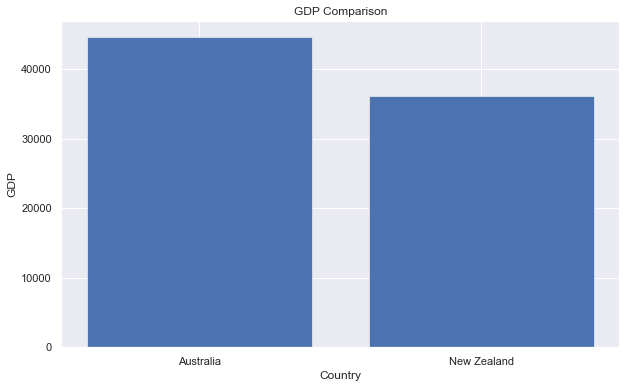

In [540]:
xaxis = comp_data_df['country']
yaxis = comp_data_df['people_fully_vaccinated_x']
plt.figure(figsize = (10, 6))
plt.bar(xaxis, yaxis, color='g', alpha=0.35, align="center")
plt.title('People fully vaccinated by Country')
plt.xlabel('Country')
plt.ylabel('Fully vaccinated')
plt.savefig('./SB_Output/Bar')

xaxis = comp_data_df['country']
yaxis = comp_data_df['total_deaths']
plt.figure(figsize = (10, 6))
plt.bar(xaxis, yaxis, color='r', alpha=0.35, align="center")
plt.title('Cases and Deaths')
plt.xlabel('country')
plt.ylabel('Deaths')
plt.savefig('./SB_Output/Bar1')

xaxis = comp_data_df['country']
yaxis = comp_data_df['gdp_per_capita']
plt.figure(figsize = (10, 6))
plt.bar(xaxis, yaxis, color='b', alpha=0.35, align="center")
plt.title('GDP Comparison')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.savefig('./SB_Output/Bar2')

The r-squared is: 0.36472635108097246


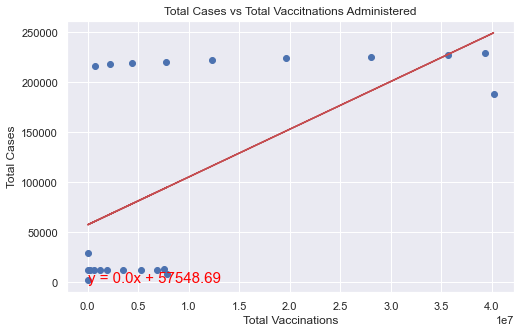

In [517]:
plt.rcParams['figure.figsize'] = [8, 5]
x_values = comp_data_df["total_vaccinations_x"]
y_values = comp_data_df["total_cases"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Total Cases vs Total Vaccitnations Administered')
plt.xlabel('Total Vaccinations')
plt.ylabel('Total Cases')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./SB_Output/Vaccinations linreg')
plt.show()

The r-squared is: 0.26779032393078184


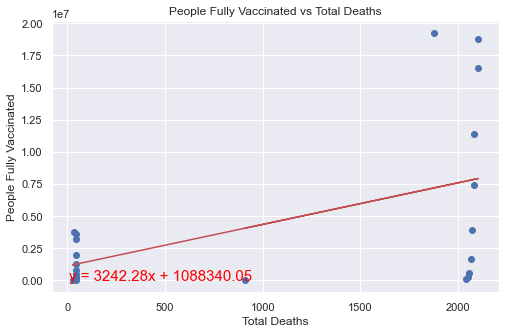

In [518]:
plt.rcParams['figure.figsize'] = [8, 5]
x_values = comp_data_df["total_deaths"]
y_values = comp_data_df["people_fully_vaccinated_x"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('People Fully Vaccinated vs Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('People Fully Vaccinated')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./SB_Output/Vaccinations linreg x')
plt.show()

The r-squared is: 0.9777903694393407


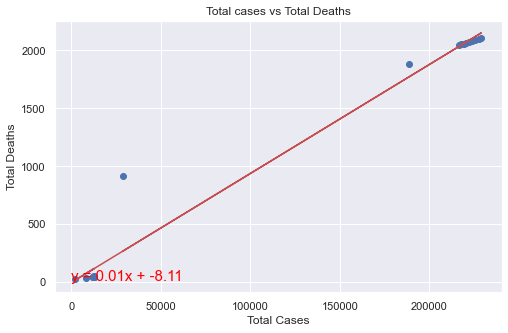

In [519]:
plt.rcParams['figure.figsize'] = [8, 5]
x_values = comp_data_df["total_cases"]
y_values = comp_data_df["total_deaths"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Total cases vs Total Deaths')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./SB_Output/Vaccinations linreg z')
plt.show()

The r-squared is: 0.292400591019507


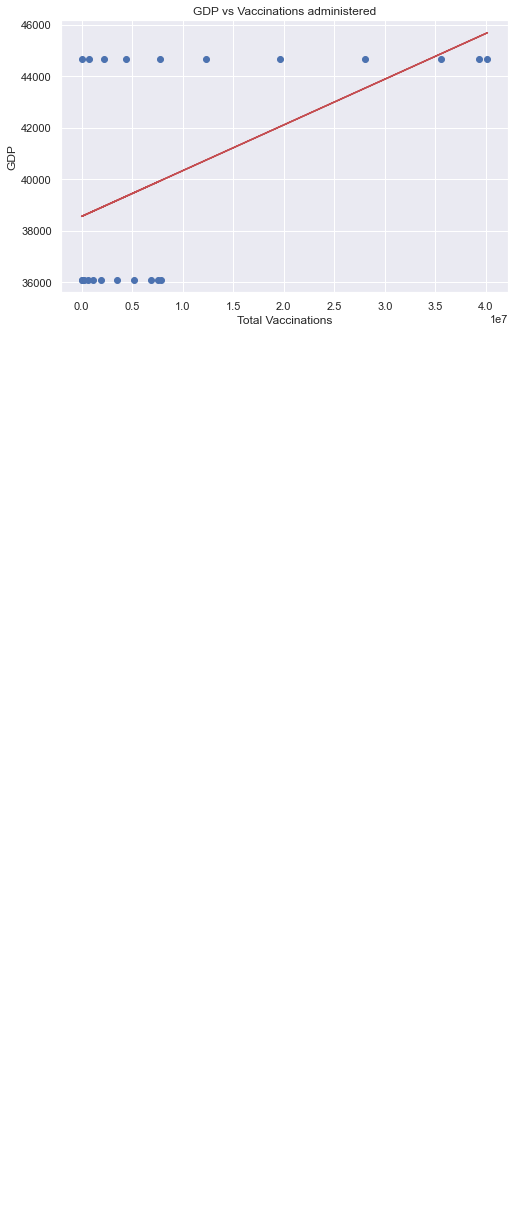

In [546]:
plt.rcParams['figure.figsize'] = [8, 5]
x_values = comp_data_df["total_vaccinations_x"]
y_values = comp_data_df["gdp_per_capita"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('GDP vs Vaccinations administered')
plt.xlabel('Total Vaccinations')
plt.ylabel('GDP')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('./SB_Output/Vaccinations linreg xs')
plt.show()

In [421]:
vacc_cases_new["total_vaccinations_x(count)"]= vacc_cases_new.groupby("country").total_vaccinations_x.tail(1)
vacc_cases_new.groupby('country')["total_vaccinations_x(count)"].mean().sort_values(ascending= False).head(20)

country
China             2.591879e+09
India             1.327494e+09
United States     4.826960e+08
Brazil            3.199801e+08
Indonesia         2.483553e+08
Japan             1.980144e+08
Mexico            1.368291e+08
Russia            1.351546e+08
Germany           1.333192e+08
Pakistan          1.326385e+08
Vietnam           1.309359e+08
Bangladesh        1.278407e+08
Turkey            1.216005e+08
United Kingdom    1.205291e+08
France            1.111985e+08
Iran              1.075318e+08
Italy             1.015159e+08
England           1.011114e+08
Thailand          9.717733e+07
Philippines       9.423699e+07
Name: total_vaccinations_x(count), dtype: float64

/Users/sonambhandari/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


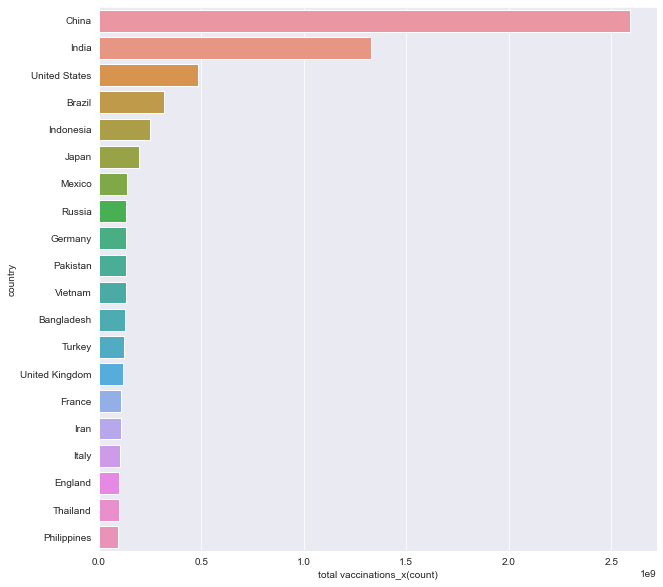

In [418]:
x= vacc_cases_new.groupby("country")["total_vaccinations_x(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("darkgrid")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("total vaccinations_x(count)")
ax.set_ylabel("country")
plt.show()